<a href="https://colab.research.google.com/github/AlexCoilaJrt/Actividad/blob/main/Clase3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install empiricaldist
!pip install pyjanitor
!pip install seaborn
!pip install statsmodels
!pip install session-info
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.0 MB/s eta 0:00:00


In [4]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
#Establecer apariencia general de los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}


In [7]:
df=pd.read_csv('penguins.csv')
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
86,Adelie,Dream,36.3,19.5,190.0,3800.0,male,2008
174,Gentoo,Biscoe,46.5,14.5,213.0,4400.0,female,2007
97,Adelie,Dream,40.3,18.5,196.0,4350.0,male,2008
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
249,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,female,2009
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
267,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,male,2009


In [8]:
#Cuantas observaciones tenemos
df.shape

(344, 8)

In [10]:
#Tipo de datos que tenemos
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


In [12]:
#Contamos la cantidad de variables por tipo
df.dtypes.value_counts()

,count
float64,4
object,3
int64,1


In [16]:
#Cantidad de nulos por variable
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [17]:
#Suma total de nulos
df.isnull().sum().sum()

np.int64(19)

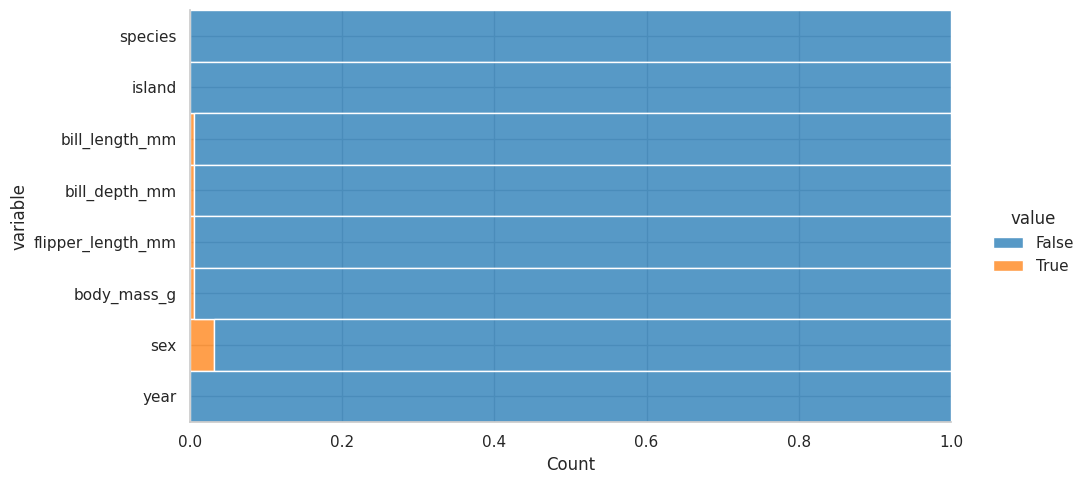

In [19]:
#Proporcion de valores nulos
df.isnull().melt().pipe(
    lambda df:(
        sns.displot(data=df,y="variable",hue='value',multiple='fill',aspect=2)
    )
)

<Axes: >

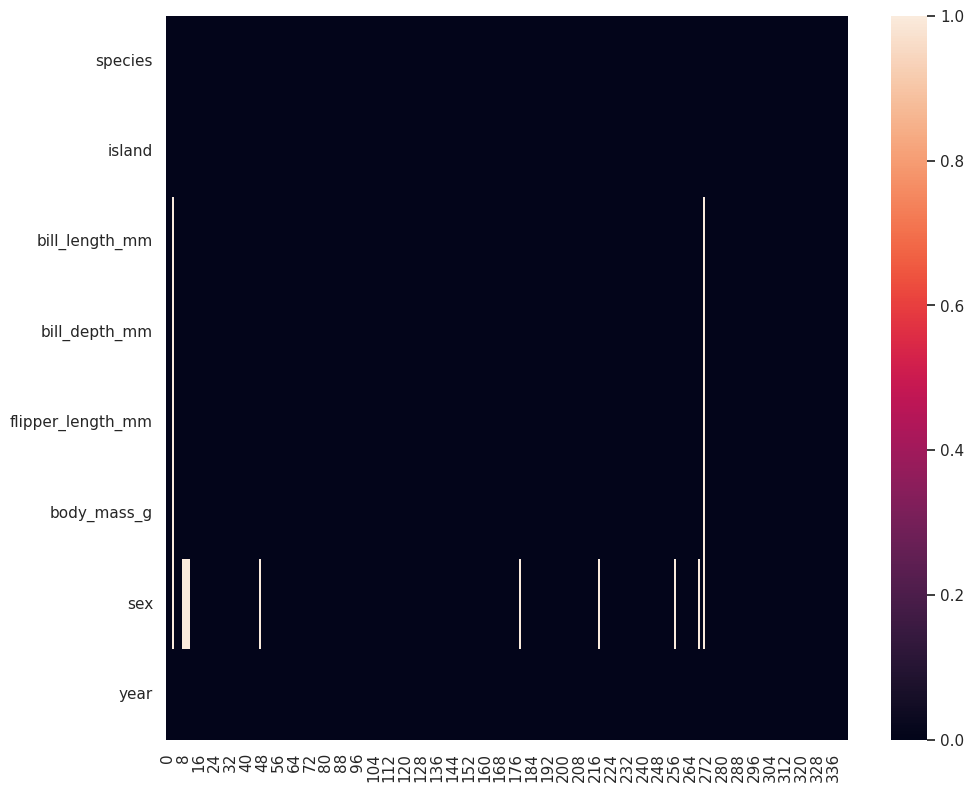

In [21]:
#Mostrara los datos nulos donde esta
df.isnull().transpose().pipe(
    lambda x: sns.heatmap(data=x)
)

In [26]:
#Eliminamos las observaciones con datos nulos
dfp=df.dropna()
dfp.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


###Graficos y Estadistica

In [28]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [64]:
#Media
df.mean(numeric_only=True)

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386
year,2008.029070


In [65]:
#Mediana
df.median(numeric_only=True)

,0
bill_length_mm,44.45
bill_depth_mm,17.30
flipper_length_mm,197.00
body_mass_g,4050.00
year,2008.00


In [67]:
#Moda
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [68]:
#Desviacion estandar
df.std(numeric_only=True)

,0
bill_length_mm,5.459584
bill_depth_mm,1.974793
flipper_length_mm,14.061714
body_mass_g,801.954536
year,0.818356


In [31]:
#Tabla de frecuencias por especies
fi=dfp.species.value_counts()
hi=dfp.species.value_counts(normalize=True)
hip=hi*100
tabla=pd.DataFrame({
    'fi': fi.values,
    'hi': hi.values,
    'hi%': hip.map('{:.2f}%'.format)
})
total=dfp.shape[0]
tabla.loc['Total'] = [total,hi.values.sum(),str(round(hip.sum(),2))+'%']
print(tabla)

            fi        hi     hi%
species                         
Adelie     146  0.438438  43.84%
Gentoo     119  0.357357  35.74%
Chinstrap   68  0.204204  20.42%
Total      333  1.000000  100.0%


In [32]:
#Tabla de frecuencias por island
fi=dfp.island.value_counts()
hi=dfp.island.value_counts(normalize=True)
hip=hi*100
tabla=pd.DataFrame({
    'fi': fi.values,
    'hi': hi.values,
    'hi%': hip.map('{:.2f}%'.format)
})
total=dfp.shape[0]
tabla.loc['Total'] = [total,hi.values.sum(),str(round(hip.sum(),2))+'%']
print(tabla)

            fi        hi     hi%
island                          
Biscoe     163  0.489489  48.95%
Dream      123  0.369369  36.94%
Torgersen   47  0.141141  14.11%
Total      333  1.000000  100.0%


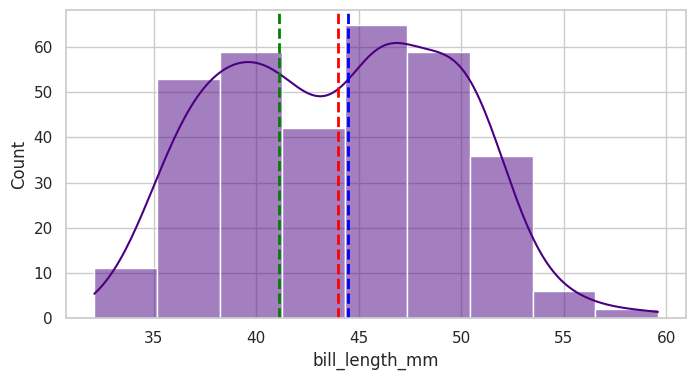

In [41]:
#Histograma: Rojo media, Azul Mediana y Verde Moda
plt.figure(figsize=(8,4))
sns.histplot(data=dfp,color='indigo',x='bill_length_mm',
    #bins=30,
    binwidth=3,
    kde=True,
)
plt.axvline(x=dfp.bill_length_mm.mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(x=dfp.bill_length_mm.median(),color='blue',linestyle='dashed',linewidth=2)
plt.axvline(x=dfp.bill_length_mm.mode()[0],color='green',linestyle='dashed',linewidth=2)
plt.show()

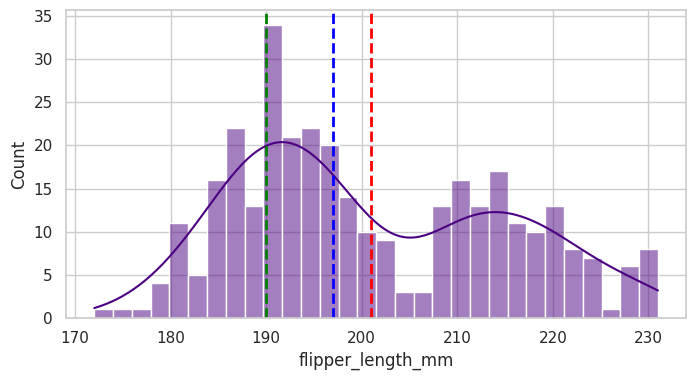

In [43]:
#Histograma: Rojo media, Azul Mediana y Verde Moda
plt.figure(figsize=(8,4))
sns.histplot(data=dfp,color='indigo',x='flipper_length_mm',
    #bins=30,
    binwidth=2,
    kde=True,
)
plt.axvline(x=dfp.flipper_length_mm.mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(x=dfp.flipper_length_mm.median(),color='blue',linestyle='dashed',linewidth=2)
plt.axvline(x=dfp.flipper_length_mm.mode()[0],color='green',linestyle='dashed',linewidth=2)
plt.show()

<Axes: xlabel='species'>

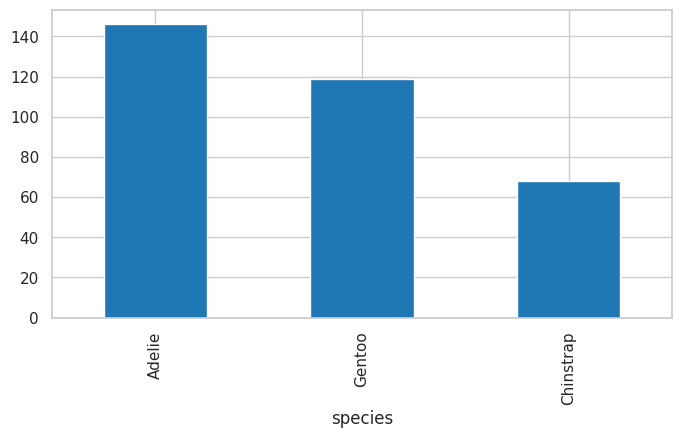

In [46]:
#Graficos
plt.figure(figsize=(8,4))
dfp.species.value_counts().plot(kind='bar')

<Axes: xlabel='species', ylabel='count'>

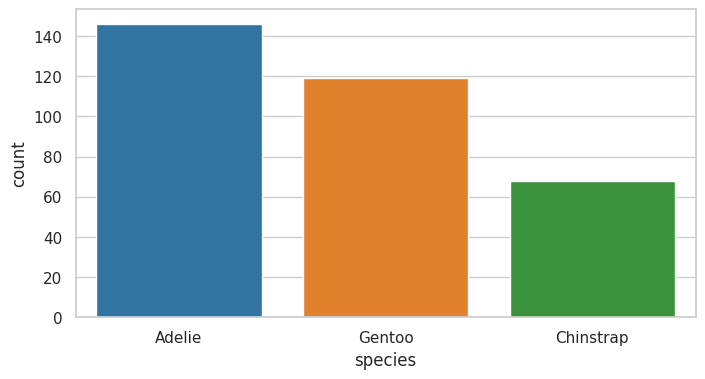

In [48]:
#Graficos de conteo por especies
plt.figure(figsize=(8,4))
sns.countplot(data=dfp,x='species',hue='species')

<Axes: xlabel='island', ylabel='count'>

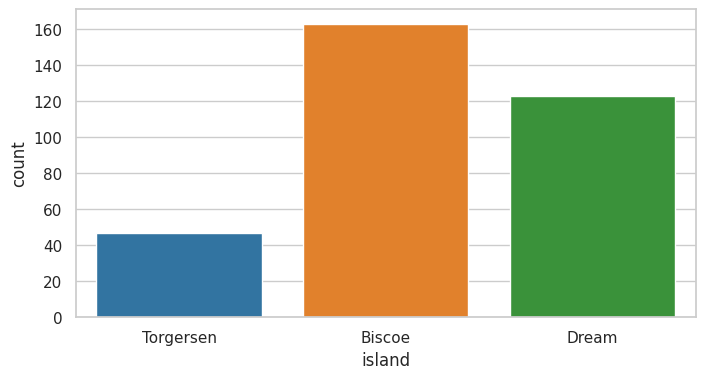

In [49]:
#Graficos de conteo por island
plt.figure(figsize=(8,4))
sns.countplot(data=dfp,x='island',hue='island')

([<matplotlib.patches.Wedge at 0x7b9b334901d0>,
 [Text(0.21141766821205873, 1.0794918107923634, 'Adelie'),
  Text(-0.8153728450579808, -0.7383543346808862, 'Gentoo'),
  Text(0.8813018233018312, -0.6582606598034462, 'Chinstrap')],
 [Text(0.11531872811566837, 0.5888137149776528, '43.8%'),
  Text(-0.44474882457708037, -0.40273872800775606, '35.7%'),
  Text(0.4807100854373624, -0.3590512689836979, '20.4%')])

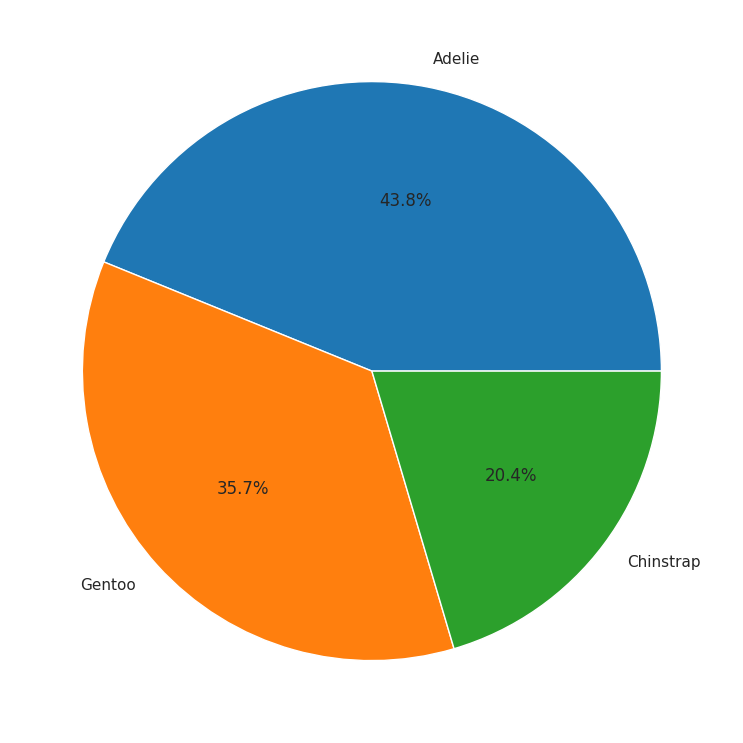

In [52]:
#Grafico de proporcion
plt.pie(dfp.species.value_counts(),labels=dfp.species.value_counts().index,autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7b9b3353d7f0>,
 [Text(0.036315111222426345, 1.0994003878009608, 'Biscoe'),
  Text(-0.5044682329378414, -0.9775028398713591, 'Dream'),
  Text(0.9936243679250859, -0.4719222557429072, 'Torgersen')],
 [Text(0.019808242484959823, 0.599672938800524, '48.9%'),
  Text(-0.275164490693368, -0.5331833672025594, '36.9%'),
  Text(0.5419769279591377, -0.2574121394961312, '14.1%')])

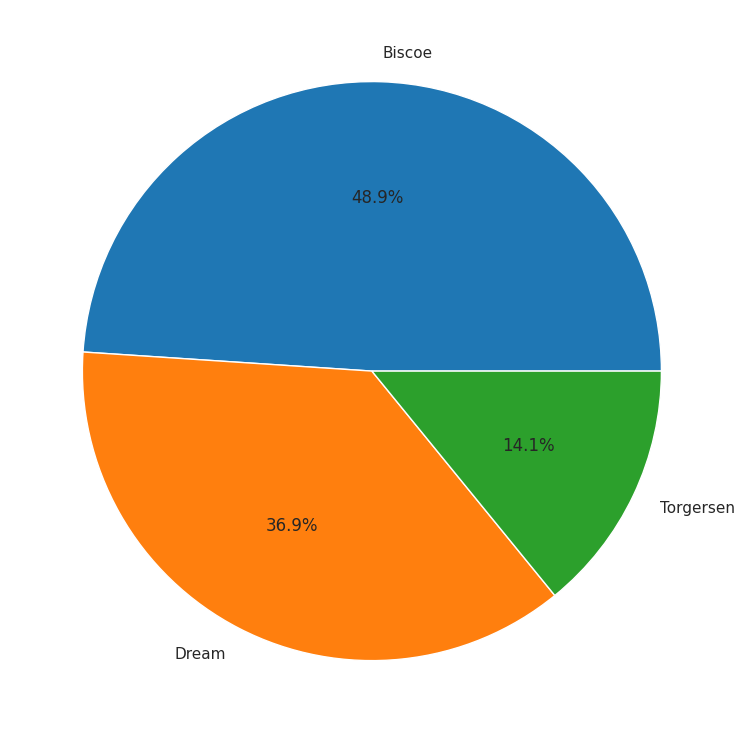

In [53]:
#Grafico de proporcion
plt.pie(dfp.island.value_counts(),labels=dfp.island.value_counts().index,autopct='%1.1f%%')

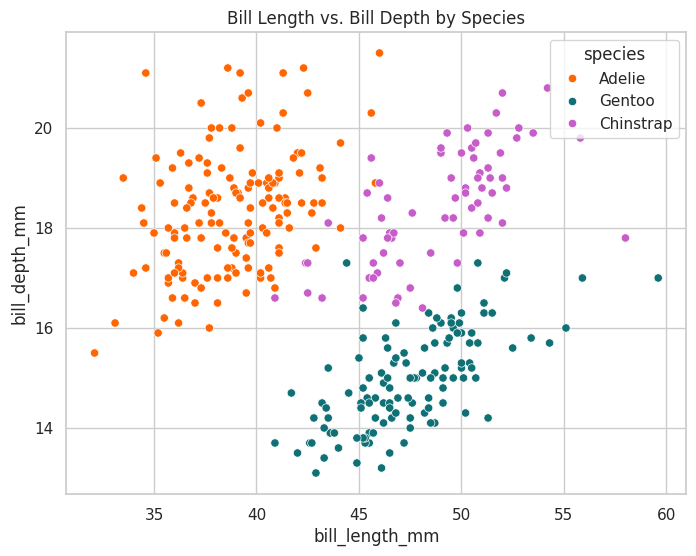

/tmp/ipython-input-4024013183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfp, x='species', y='body_mass_g', palette=penguin_color)


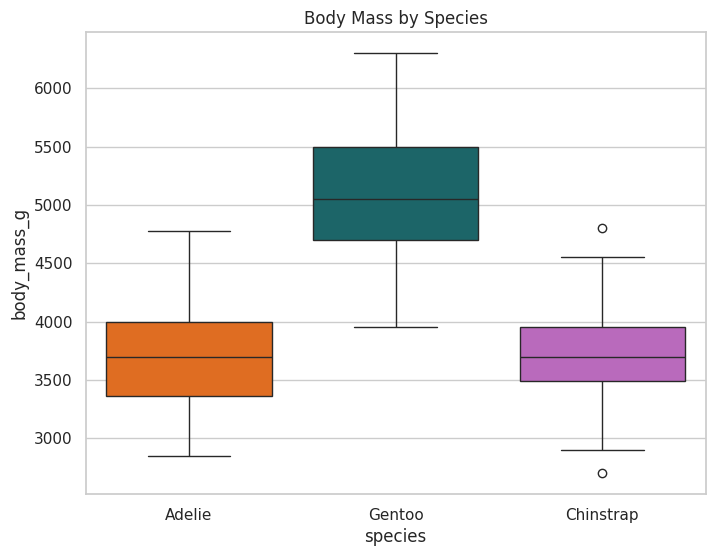

/tmp/ipython-input-4024013183.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfp, x='species', y='flipper_length_mm', palette=penguin_color)


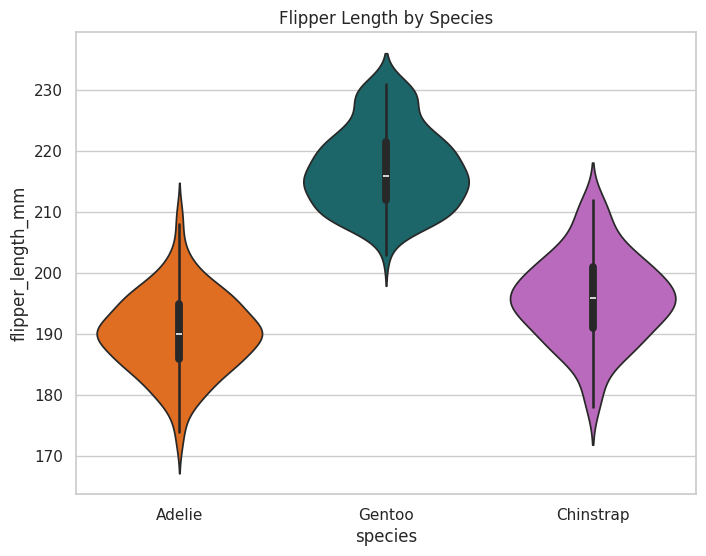

/tmp/ipython-input-2049883561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=dfp, x='species', y='bill_depth_mm', palette=penguin_color)


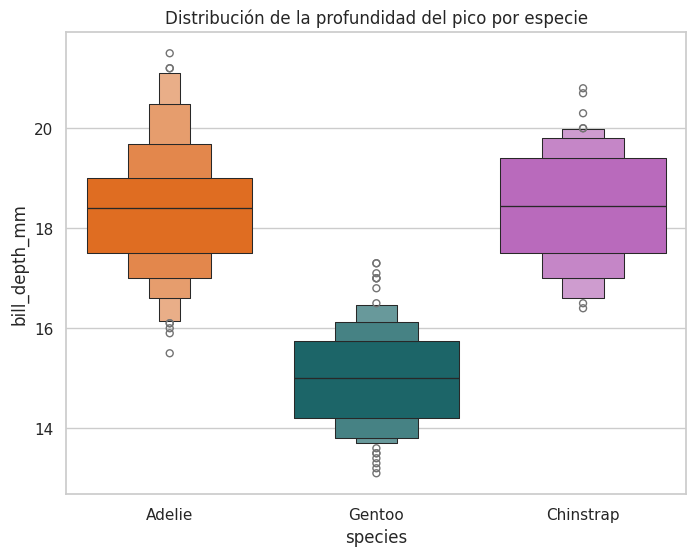

/tmp/ipython-input-2049883561.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=dfp, x='year', y='flipper_length_mm', hue='species', palette=penguin_color, ci=None)


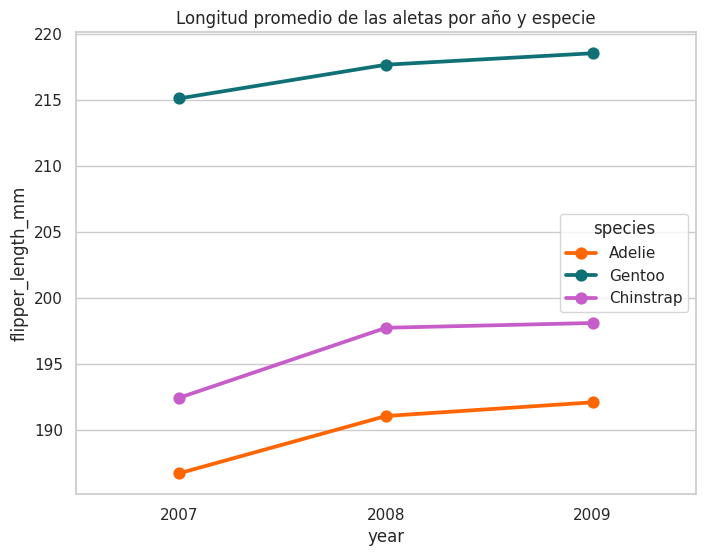

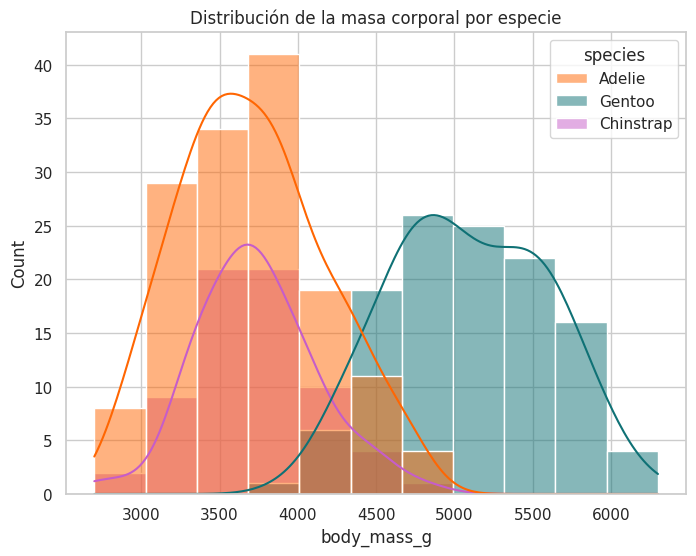

In [61]:
# Boxen plot de la profundidad del pico por especie
plt.figure(figsize=(8, 6))
sns.boxenplot(data=dfp, x='species', y='bill_depth_mm', palette=penguin_color)
plt.title('Distribución de la profundidad del pico por especie')
plt.show()

# Point plot de la longitud promedio de las aletas por año y especie
plt.figure(figsize=(8, 6))
sns.pointplot(data=dfp, x='year', y='flipper_length_mm', hue='species', palette=penguin_color, ci=None)
plt.title('Longitud promedio de las aletas por año y especie')
plt.show()

# Histograma de la masa corporal por especie
plt.figure(figsize=(8, 6))
sns.histplot(data=dfp, x='body_mass_g', hue='species', kde=True, palette=penguin_color)
plt.title('Distribución de la masa corporal por especie')
plt.show()


###Diagrama de cajas y bigotes(Boxplot)

<Axes: xlabel='flipper_length_mm'>

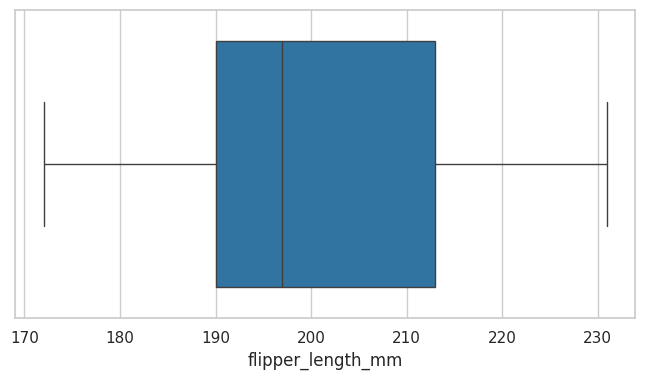

In [77]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dfp,x='flipper_length_mm')

###Rango intercuartilico -IQR
IQR=(Q3-Q1)->medida de la dispersión basado en la mediana.
IQR también se utiliza a menudo para encontrar valores atípicos. Si un valor es menor que Q1-1.5 * IQR o mayor que Q3+1.5 * IQR , se considera un valor atípico. De hecho, así es como se calculan las longitudes de los bigotes en un diagrama de caja


In [70]:
dfp.quantile([.25,.50,.75],numeric_only=True).T.rename_axis('variable').assign(
    IQR=lambda df: df[0.75] - df[0.25],
    RMIN=lambda df: df[0.25] - 1.5 * df['IQR'],
    RMAX=lambda df: df[0.75] + 1.5 * df['IQR']
)

,0.25,0.5,0.75,IQR,RMIN,RMAX
variable,,,,,,
bill_length_mm,39.5,44.5,48.6,9.1,25.85,62.25
bill_depth_mm,15.6,17.3,18.7,3.1,10.95,23.35
flipper_length_mm,190.0,197.0,213.0,23.0,155.50,247.50
body_mass_g,3550.0,4050.0,4775.0,1225.0,1712.50,6612.50
year,2007.0,2008.0,2009.0,2.0,2004.00,2012.00


<Axes: xlabel='bill_length_mm'>

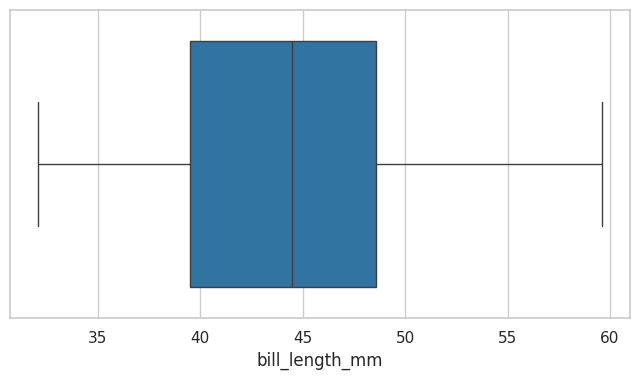

In [75]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dfp,x='bill_length_mm')

/tmp/ipython-input-2489474390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfp, x='species', y='bill_depth_mm', palette=penguin_color)


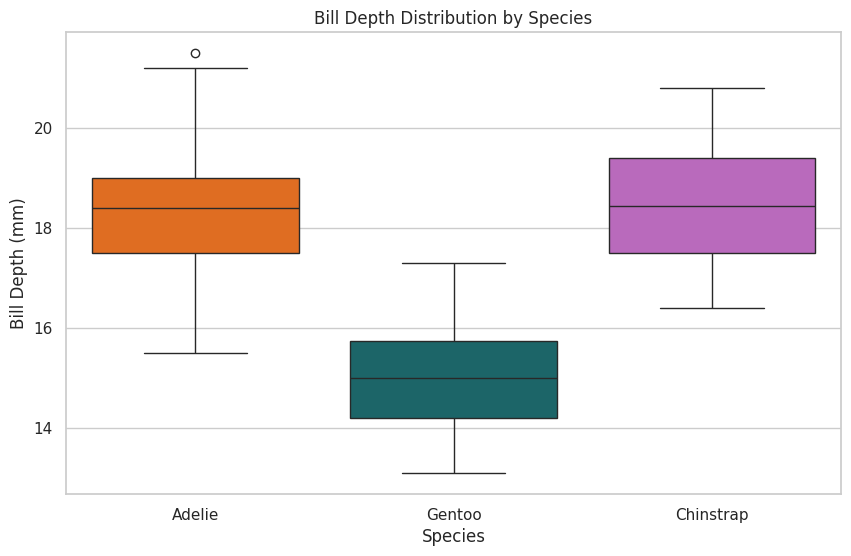

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfp, x='species', y='bill_depth_mm', palette=penguin_color)
plt.title('Bill Depth Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

/tmp/ipython-input-3377872011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfp, x='species', y='body_mass_g', palette=penguin_color)


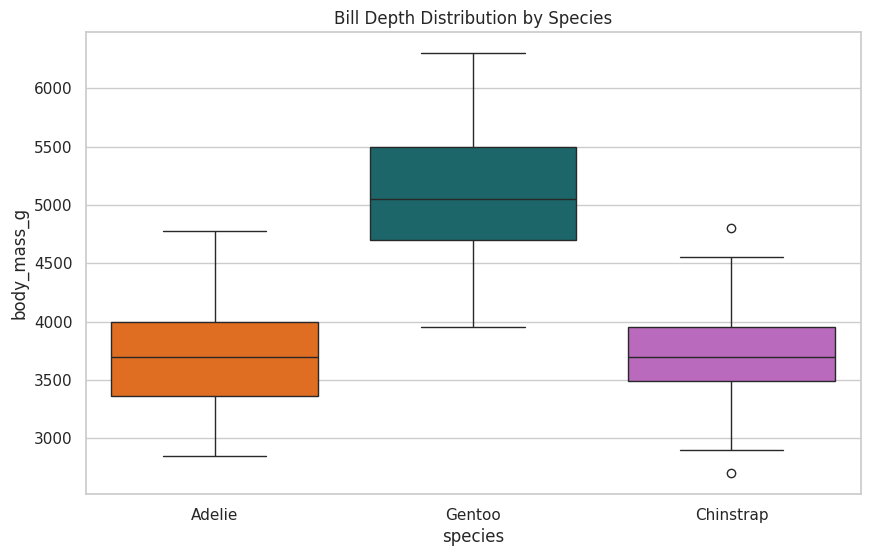

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfp, x='species', y='body_mass_g', palette=penguin_color)
plt.title('Bill Depth Distribution by Species')
plt.show()

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

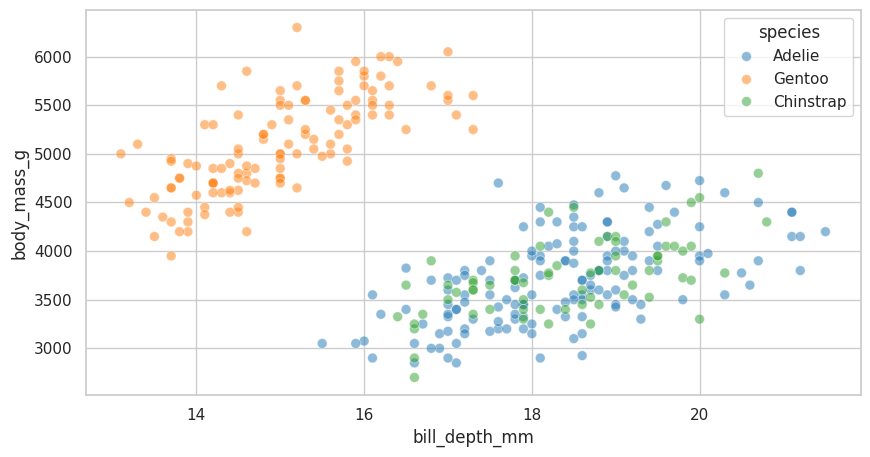

In [85]:
#Scatterplot: Grafico de puntos+
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfp,x='bill_depth_mm',y='body_mass_g',hue='species',alpha=0.5,s=50)

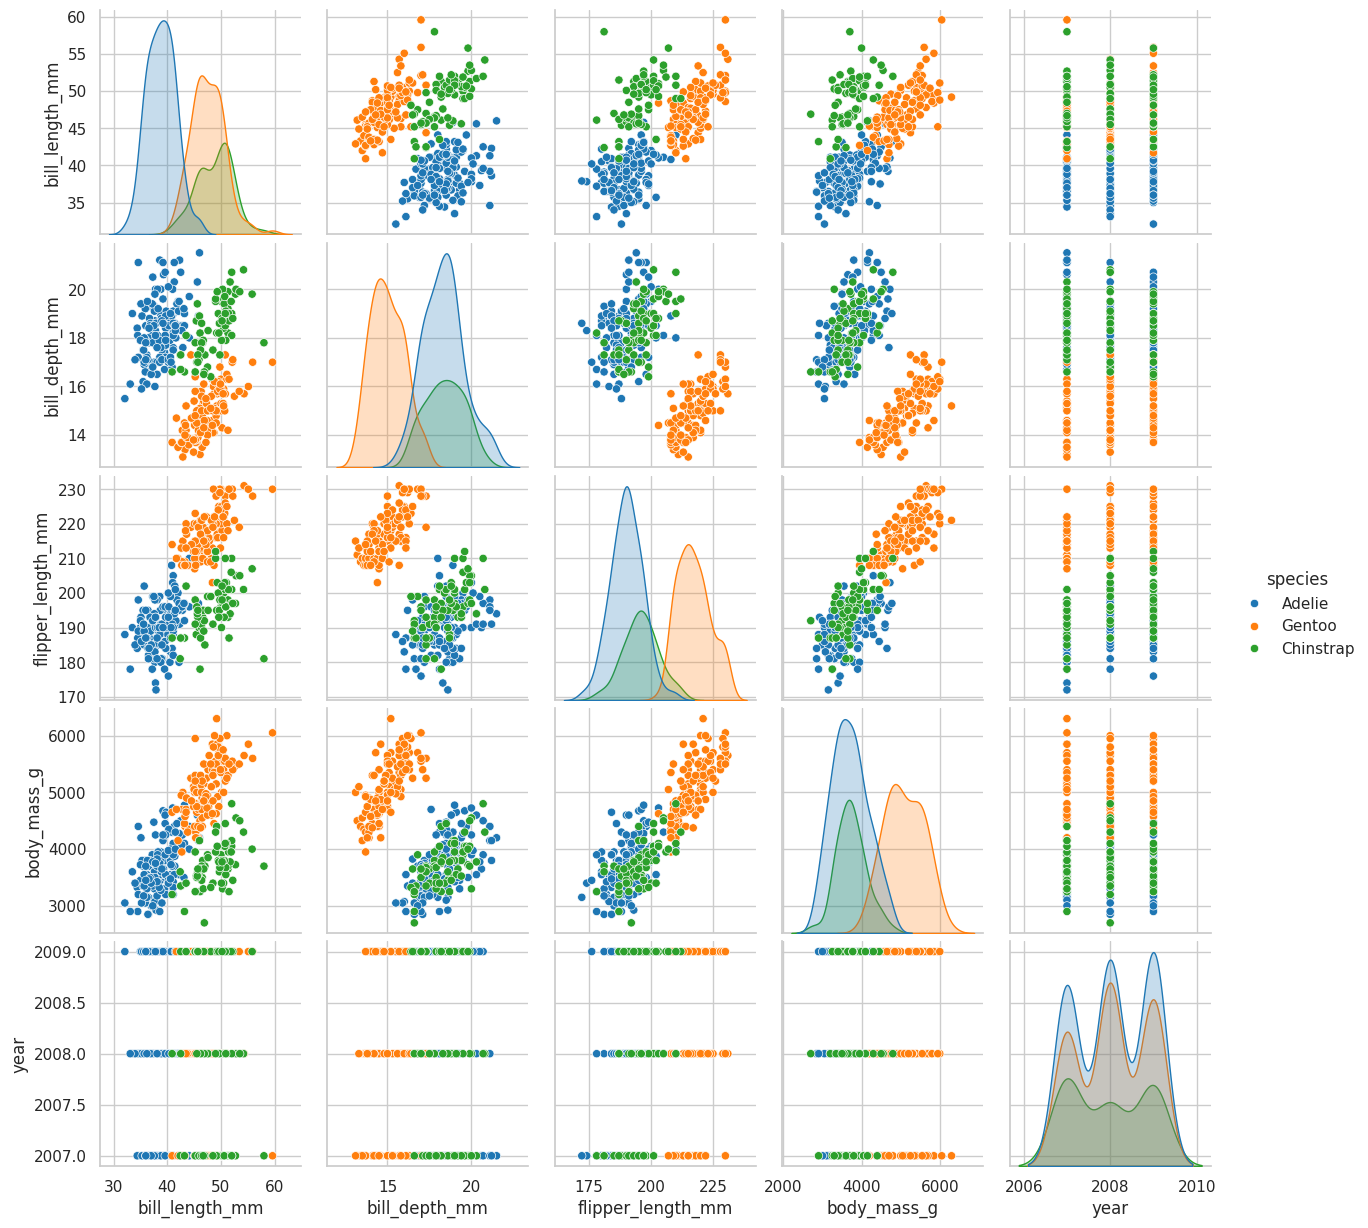

In [86]:
#cuanto no se tiene tiempo se usa este codigo apra que te muestre todos los graficos
sns.pairplot(data=dfp,hue='species')

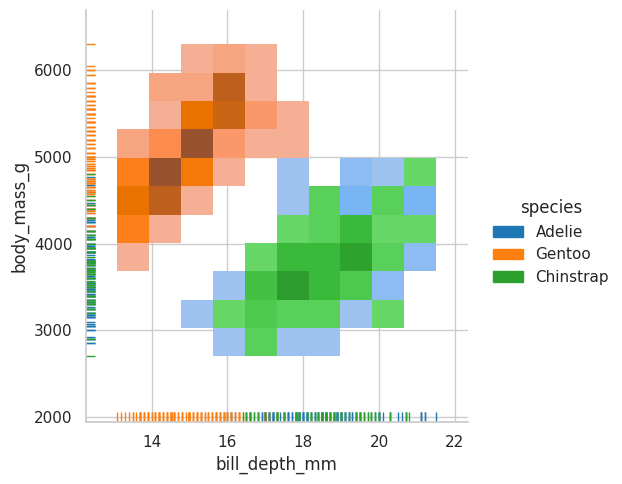

In [91]:
#Histograma 2D, nos muestra la cantidad de valores dentro de x - y
sns.displot(data=dfp,x='bill_depth_mm',y='body_mass_g',rug=True, hue='species');

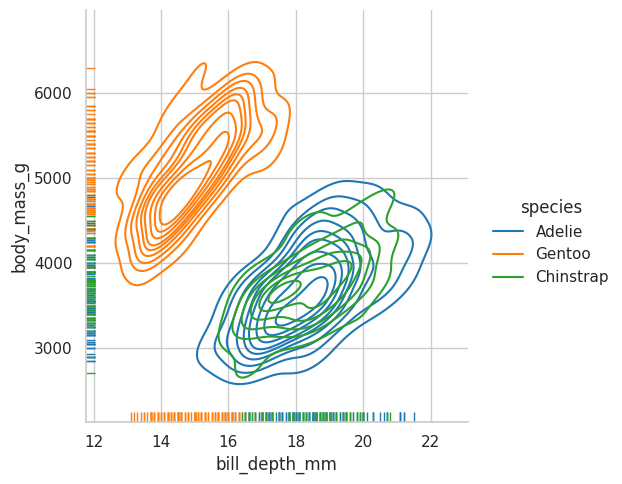

In [89]:
#Grafico de densidades: para apreciar donde se acumulan los datos con mayor densidad
sns.displot(data=dfp,x='bill_depth_mm',y='body_mass_g',rug=True,kind='kde',hue='species');

<Axes: xlabel='species', ylabel='bill_depth_mm'>

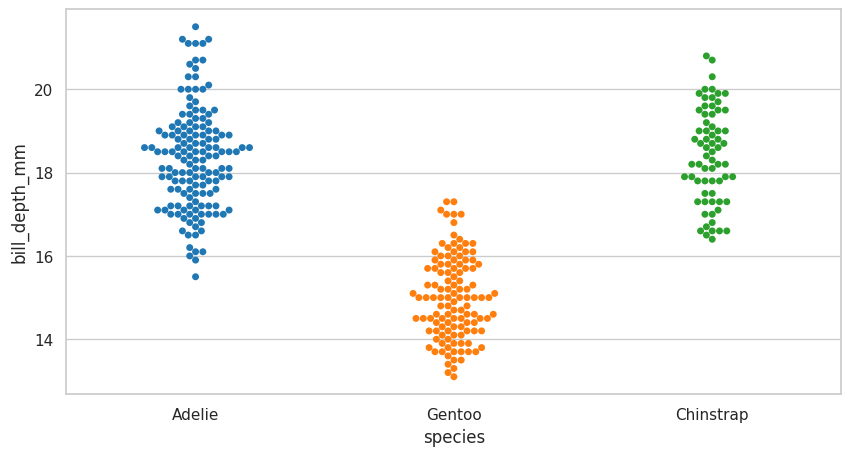

In [93]:
#Swarmplot: similar a la del stripplot, pero los puntos se ajustan
#(solo a lo largo del eje categórico) para que no se superpongan
plt.figure(figsize=(10,5))
sns.swarmplot(
    data=dfp,
    x='species',
    y='bill_depth_mm',
    hue='species',
    s=5
)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

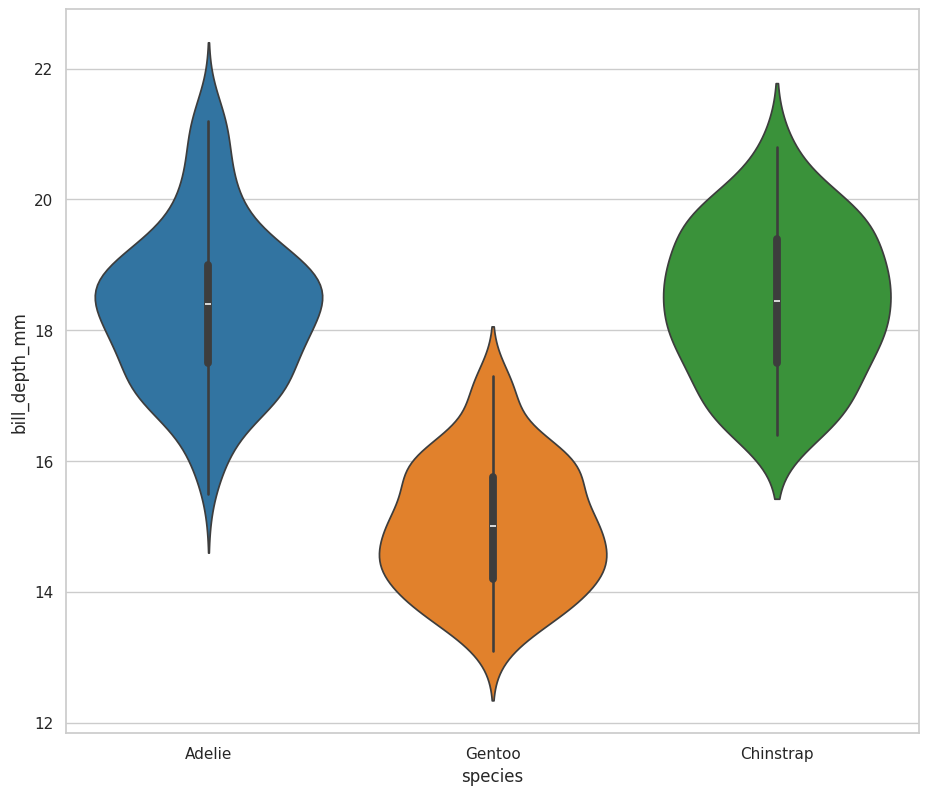

In [94]:
sns.violinplot(data=dfp,x='species',y='bill_depth_mm',hue='species')

###Estableciendo relaciones:matrices de correlacion
Cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación.
Correlación no implica causalidad. Causalidad: Cuando algo (la causa) genera otra cosa (efecto)
- 0: asociación nula.
- 0.1: asociación pequeña.
- 0.3: asociación mediana.
- 0.5: asociación moderada.
- 0.7: asociación alta.
- 0.9: asociación muy alta.

In [96]:
#Coeficientes de correlacion
#Matrices de correlacion
dfp.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<Axes: >

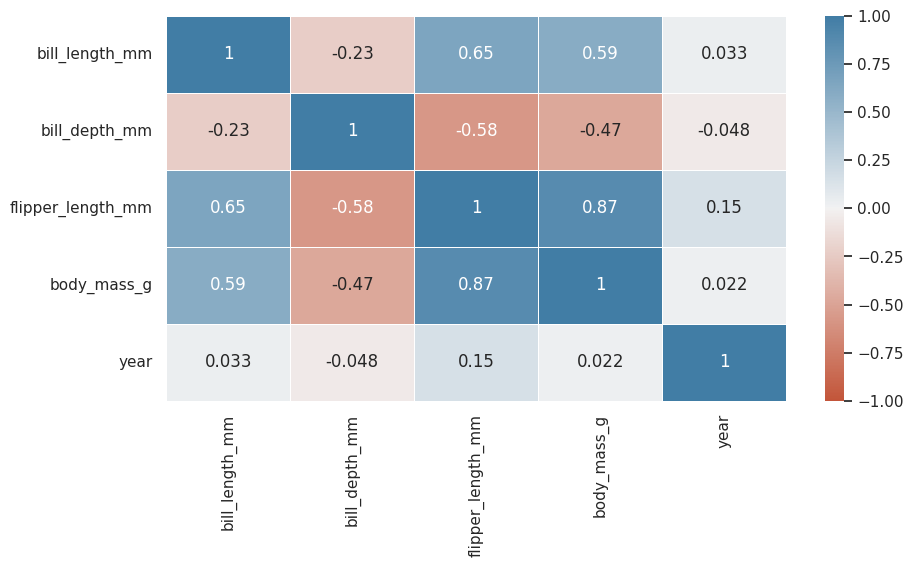

In [97]:
#Visualizando los los coeficientes de correlación
plt.figure(figsize=(10,5))
sns.heatmap(
    data=dfp.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=.5,
    annot=True,
)